# Harmonic oscillator 

We have an Hamiltonian system
$$\dot{y} = J^{-1} \nabla H(y) $$
with $y = (p,q) \in \mathbb{R}^{2d}$ and $J=\begin{pmatrix}0 & I \\ -I & 0 \end{pmatrix} \in M_{2d}(\mathbb{R})$

In this case  $d=1$ and we have the following hamiltonian
\begin{equation}
H(p,q) = \frac{1}{2}\left(p^2 + q ^2\right)
\end{equation}

Thus

$$
\left\{\begin{matrix}
       \frac{\partial p}{\partial t} &=& - q \\
       \frac{\partial q}{\partial t} &=& p\\
\end{matrix}\right.
$$


### Imports

In [1]:
import sys
sys.path.append('Euler')
import EulerImplicitOscillator as EIO
import parareal as para
import RK2
import RK4
import StormerOscillator as SO
import HamiltonianFunctions as func
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [10, 5]



### Constants

In [2]:
T = 1000
N = 10000
y0 = np.array([0, 1])
delta_t = T/N
dtg = delta_t
dtf = dtg/100
epsilon = 1/N


## Plot

Text(0.5, 1.0, 'Stormer Verlet vs exact')

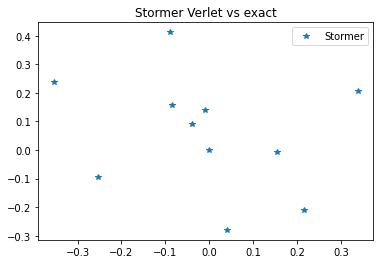

In [3]:
%matplotlib inline

tab_test = SO.tab_Stormer(func.Oscillator,0,T//100,y0,delta_t*10)

tab_t = np.linspace(0, T//100, len(tab_test[0]))
sol_ex = np.array([-np.sin(tab_t),np.cos(tab_t)])
plt.plot(tab_test[1,:]-sol_ex[1,:], tab_test[0,:]-sol_ex[0,:],'*', label = 'Stormer')
plt.legend()
plt.title('Stormer Verlet vs exact')


In [4]:
#tab_y = para.parareal(func.Oscillator, SO.Stormer,
                      #SO.Stormer, T, y0, dtf, dtg, N, epsilon)

#plt.plot(sol_ex[0], sol_ex[1], 'x', label='exact')
#plt.plot(tab_y[0, :], tab_y[1, :], 'o', label='parareal')
#plt.legend()
#plt.title('Parareal vs exact')

## Error computation on parareal algorithm for harmonic oscillator

### Error on y

In [5]:
#tab_err = para.parareal_err(func.Oscillator, SO.tab_Stormer, SO.tab_Stormer, T//100, y0, dtf, dtg, N//100, epsilon)
#plt.loglog(np.linspace(1,len(tab_err),len(tab_err)),tab_err, label = 'error on y')
#plt.xlabel('Iteration')
#plt.ylabel('Error')
#plt.legend()

### Error on the Hamiltonian

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6


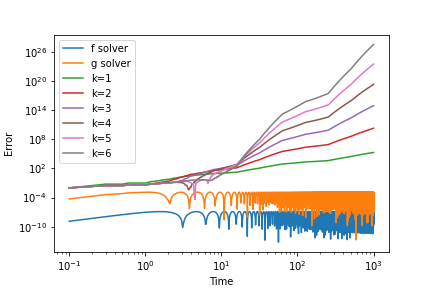

In [6]:
tab_Ha = para.parareal_Ha_Oscillator(func.Oscillator, SO.Stormer, SO.Stormer, T, y0, dtf, dtg, N, epsilon)

kmax = len(tab_Ha)

tab_t = np.linspace(0,T,N+1)

tab_Ha0 = 0.5 * np.ones(len(tab_Ha[0,:]))
%matplotlib widget
plt.loglog(tab_t[1:],np.abs(tab_Ha[0,1:]), label ="f solver")
plt.loglog(tab_t[1:],np.abs(tab_Ha[1,1:]), label ="g solver")

for k in range(2,kmax):
    plt.loglog(tab_t[1:],np.abs(tab_Ha[k,1:]), label =f"k={k-1}")
    plt.xlabel('Time')
    plt.ylabel('Error')

plt.legend()

In [7]:
for k in range(kmax):
    slope, intercept = np.polyfit(np.log(tab_t)[1:],np.log(np.abs(tab_Ha[k,1:])),1)
    print(f"pente {k-1}", slope)



pente -1 6.851773312246423e-05
pente 0 -0.003036253114087154
pente 1 2.1020764033007526
pente 2 4.182064685829679
pente 3 6.263326489029625
pente 4 8.360772322767003
pente 5 10.434919070487183
pente 6 12.469267935904824


/tmp/ipykernel_32372/2249865532.py:2: RuntimeWarning: divide by zero encountered in log
  slope, intercept = np.polyfit(np.log(tab_t)[1:],np.log(np.abs(tab_Ha[k,1:])),1)
